In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent

## 1. Gradient descent in one dimension

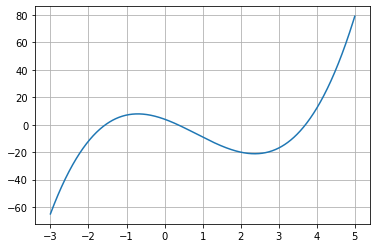

In [54]:
def p(x):
    y = 2*x**3 - 5*x**2 - 10*x + 4
    return y

xx = np.linspace(-3,5,1000)
f = p(xx)
plt.plot(xx, f)
plt.grid()
plt.show()

### Finding the local minimum with Gradient Descent

2.3699240762154803    Correct:  2.369924076215481


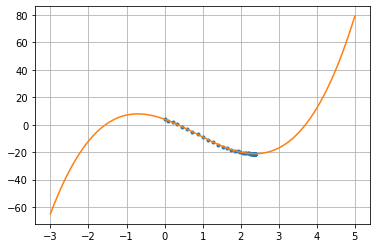

In [55]:
def p(x):
    y = 2*x**3 - 5*x**2 - 10*x + 4
    return y

# dp(x) is the derivative dp(x)/dx
def dp(x):
    y = 6*x**2 - 10*x - 10
    return y

x = 0  # Starting point
path_x = np.array([x])
alpha = 0.01

for k in range(1000):
    x = x - alpha*dp(x)
    path_x = np.append(path_x, x)
    
# Compare the result with the exact solution    
print(x, "   Correct: ", (5+np.sqrt(85))/6)
    
path_y = p(path_x)
plt.plot(path_x, path_y, '.')

xx = np.linspace(-3,5,1000)
f = p(xx)
plt.plot(xx, f)
plt.grid()
plt.show()

## 2. Gradient Descent in two dimensions

In [56]:
def f(x,y):
    return 2*x**2 + y**2 + 5*x - 3*y

def df(x,y):
    dx = 4*x + 5
    dy = 2*y - 3
    return dx, dy

x = 5
y = -4
alpha = 0.1
path_x = np.array([x])
path_y = np.array([y])

for k in range(100):
    dx, dy = df(x, y)
    x = x - alpha*dx
    y = y - alpha*dy
    path_x = np.append(path_x, x)
    path_y = np.append(path_y, y)
    
print("x = ", x, "     y = ", y)    

x =  -1.2499999999999998      y =  1.49999999887963


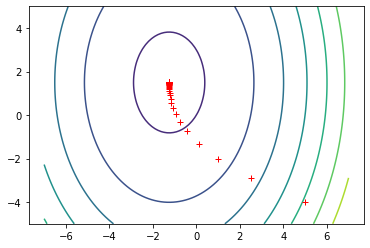

In [57]:
xx = np.linspace(-7, 7, 100)
yy = np.linspace(-5, 5, 100)
(X, Y) = np.meshgrid(xx, yy)
Z = 2*X**2 + Y**2 + 5*X - 3*Y
plt.contour(X, Y, Z)
plt.plot(path_x, path_y, 'r+')
plt.axis('equal', adjustable='datalim')
plt.show()

## 3. Linear regression with Gradient Descent

In [58]:
x = np.arange(1,11).reshape(10,1)
y = np.array([14, 12, 34, 24, 43, 38, 41, 57, 55, 50]).reshape(10,1)
X = np.concatenate((np.ones((10,1)), x), axis=1)

M = np.random.randn(2, 1)
alpha = 0.001

for k in range(10000):
    dS = 2*X.T.dot(X.dot(M) - y)
    M = M - alpha*dS
    
print("Theta0 = ", M[0])
print("Theta1 = ", M[1])

Theta0 =  [10.6]
Theta1 =  [4.76363636]


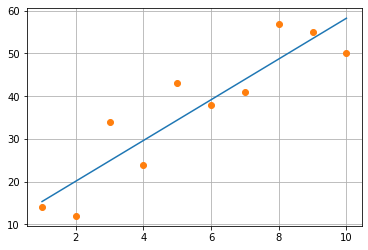

In [59]:
z = X.dot(M)
plt.plot(x, z)
plt.plot(x, y, 'o')
plt.grid()
plt.show()

In [60]:
# Calculate the coefficients using normal equations
M = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Theta0 = ", M[0])
print("Theta1 = ", M[1])

Theta0 =  [10.6]
Theta1 =  [4.76363636]


## 4. Logistic Regression with Gradient Descent

In [61]:
from sklearn.linear_model import LogisticRegression

def sigmoid(x):
    return 1/(1 + np.exp(-x))

### Simulate Data for Logistic Regression

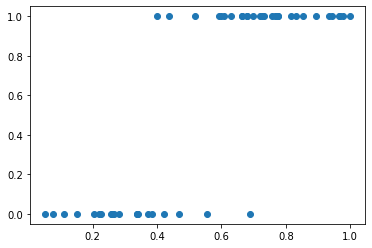

In [62]:
n = 50;
x = np.random.rand(n,1)

a = -8;
b = 17;
y = np.rint(sigmoid(a + b*x + 2*np.random.randn(n,1)))

plt.plot(x, y, 'o')
plt.show()

Number of errors:  4.0  /  50
Theta0 =  [-7.36513879]
Theta1 =  [14.88719978]


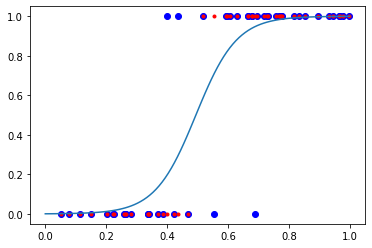

In [63]:
X = np.concatenate((np.ones((n,1)), x), axis=1)

M = np.random.randn(2, 1)
alpha = 0.1

for k in range(100000):
    y_hat = sigmoid(X.dot(M))
    dM = -X.T.dot(y - y_hat)/n
    M = M - alpha*dM
    
z_hat = np.rint(sigmoid(X.dot(M)))

print('Number of errors: ', np.sum(np.abs(z_hat - y)), ' / ', n)
print("Theta0 = ", M[0])
print("Theta1 = ", M[1])

plt.figure()
plt.plot(x, y, 'bo')
plt.plot(x, z_hat, 'r.')

xx = np.linspace(0, 1, 100)
yy = sigmoid(M[0] + M[1]*xx)
plt.plot(xx, yy)
plt.show()

### Logistic Regression with SkLearn

Number of errors:  4.0  /  50
Theta0 =  -7.372373873369118
Theta1 =  14.901228878254427


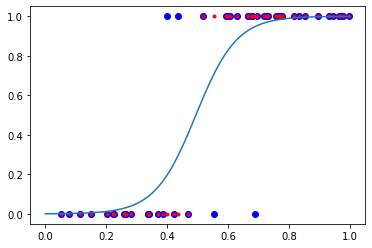

In [64]:
model = LogisticRegression(solver='sag', max_iter=10000, penalty='none')

y1 = y.reshape(n)
p = model.fit(x, y1)
z_hat = p.predict(x)

print('Number of errors: ', np.sum(np.abs(z_hat - y1)), ' / ', n)
Theta0 = model.intercept_[0]
Theta1 = model.coef_[0][0]
print("Theta0 = ", Theta0)
print("Theta1 = ", Theta1)

plt.plot(x, y, 'bo')
plt.plot(x, z_hat, 'r.')

xx = np.linspace(0, 1, 100)
yy = sigmoid(Theta0 + Theta1*xx)
plt.plot(xx, yy)
plt.show()